In [1]:
# DATA PREPA
import pandas as pd

# VIZUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from .csv (after preparing it in Excel)

In [2]:
data = pd.read_csv('../raw_data/data.csv',sep=";")
data.head(2)

,User,Module,Step,Question,Answer,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the data

## Removing empty columns

After loading the data that was exported from Excel, it created few ; at the end of each line. And it resulted in having empty columns. So let's remove them.

In [3]:
data = data.loc[:,'User':'Answer']
print(f'Shape of data: {data.shape}')
print(f'The number of all participants: {data.User.nunique()}')

Shape of data: (2779, 5)
The number of all participants: 70


In [4]:
data.head(2)

,User,Module,Step,Question,Answer
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my..."
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,..."


## Removing empty rows

Within the Excel file there were empty rows after each participant. We removed the rows that were empty in 'User' column. There were 200 rows like that.

In [5]:
print(f'Number of empty rows to remove: {data.User.isnull().sum()}')

Number of empty rows to remove: 200


In [6]:
data = data.dropna(subset=['User'])
data.shape

(2579, 5)

## Removing duplicates

We checked if (by accident) there are some duplicated question-answer pair. And we found 15 rows like that, we also removed them.

In [7]:
print(f'Number of duplicated rows: {data.duplicated().sum()}')

Number of duplicated rows: 15


In [8]:
print(f'Looking at duplicated rows:')
display(data[data.duplicated()])

Looking at duplicated rows:


,User,Module,Step,Question,Answer
2547,CD Female (30s) South Africa,Module_4,Step_11,What is the story you are telling yourself abo...,"The story I am telling, or at least my perspec..."
2548,CD Female (30s) South Africa,Module_4,Step_11,What changes when you invite curiosity and “I ...,"I immediately go from an immovable, debilitati..."
2549,CD Female (30s) South Africa,Module_4,Step_11,What else is there to discover when you invite...,New perspectives. A way forward. Solutions. An...
2550,CD Female (30s) South Africa,Module_4,Step_11,Consider a relationship in your life that woul...,I would start by simply asking more questions....
2551,CD Female (30s) South Africa,Module_4,Step_13,"Reflecting on what you’ve observed so far, wha...","Sjoe, one of the most consistent and persuasiv..."
2552,CD Female (30s) South Africa,Module_4,Step_13,What is the impact of this on your life?,"Believing this story has slowed me down, it ha..."
2553,CD Female (30s) South Africa,Module_4,Step_13,Now it’s time to rewrite this story. How does ...,"So my negative thoughts/voice often say ""You w..."
2554,CD Female (30s) South Africa,Module_4,Step_13,What is possible for you if you go into the wo...,Opportunities for growth and opportunities to ...
2555,CD Female (30s) South Africa,Module_4,Step_13,What was this experience like for you?,Oddly reassuring. I really hope I remember to ...
2556,CD Female (30s) South Africa,Module_4,Step_13,What are you learning about the power of refra...,Reframing is essential to navigating through l...


Looks like for one participant Module 4 info was copied twice! Let's remove it!

In [9]:
data = data.drop_duplicates()
data.shape

(2564, 5)

## Adding count of words per answer

We created a function to count words in each answer and we use it to engineer new column 'Answer_lenght'.

In [10]:
def count_words_in_answer(answer):
    if type(answer) == str:
        result = len(list(str(answer).split(" ")))
    else:
        result = 0
    return result

# Adding a new column with the length of each answer
data['Answer_length'] = data['Answer'].apply(lambda x: count_words_in_answer(x))
data.head(3)

,User,Module,Step,Question,Answer,Answer_length
0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2


Let's plot the distribution of length of all the answers:

<AxesSubplot:xlabel='Answer_length', ylabel='Count'>

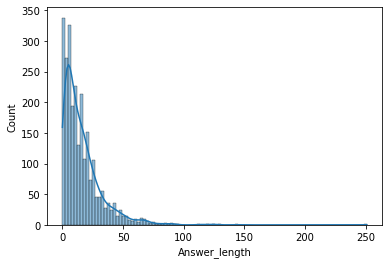

In [11]:
sns.histplot(data['Answer_length'], kde=True)

## Removing NaN answers

We checked if all answers are not missing. And we discovered that there are 2 missing answers so we removed them.

In [12]:
print(f'Number of Nan values insead of answer: {data.Answer.isnull().sum()}')

Number of Nan values insead of answer: 2


In [13]:
data[data.Answer.isnull()]

,User,Module,Step,Question,Answer,Answer_length
650,SM Female (30s) South Africa,Module_1,Step_2,How do you want to remember this?,NaN,0
1836,SM Female (30s) South Africa,Module_2,Step_7,"We love attaching a metaphor, saying, action, ...",NaN,0


In [14]:
data = data.dropna(subset=['Answer'])
data.shape

(2562, 6)

## Examination of short answers (length < 4)

In [15]:
data[data['Answer_length'] == 3].groupby('Answer').count()

,User,Module,Step,Question,Answer_length
Answer,,,,,
"""Agenda, Engage, Assess""",1,1,1,1,1
"""Re-frame your mind""",1,1,1,1,1
"""We are family""",1,1,1,1,1
A balanced scale,1,1,1,1,1
A daily reminder,1,1,1,1,1
...,...,...,...,...,...
relaxation and peace,1,1,1,1,1
settled and calm,1,1,1,1,1
shortness of breath,1,1,1,1,1


In [16]:
data[data['Answer_length'] < 2].Answer.unique()

array(['Freedom', 'Calming', 'Integrity', 'Signposts', 'Courage',
       'Equity', 'crates', 'Mantra', 'Happiness', 'People', 'Family',
       'good.', 'calming', 'Triangle', 'Relaxing', 'Mantra..', 'Loyalty',
       'trust', 'cool', 'Progress.', 'Balance', 'Calm', 'mantra',
       'refreshing!', 'connection', 'Exercise', 'curious', 'Grounding',
       'Hugs', 'Generosity', 'Compassion', 'Curiosity', 'Authenticity',
       'Excellence', 'good', 'authenticity', 'curiosity', 'Fitness',
       'Well-being', 'x', 'Relazing.', 'Patience', '-', 'Evolution.',
       'freedom', 'realness', 'relaxing', 'travel', 'integrity',
       'Responsibility', 'Contentment', 'centring', 'leadership',
       'Knowledge', 'Books', 'Respect', 'Soothing.', 'euphoric',
       'Stressful!', 'Fantastic!', 'Lethargic', 'Sad', 'Buzzing', 'Good',
       'Darkness', 'Tension', 'Frustrating', 'Energising', 'unpleasant',
       'wonderful', 'Sure', 'Peaceful', 'exhausting', 'discovery', 'calm',
       'Darkness/Fog', 

# Exploring the data

To explore data fro each participant, we created a function to extract information per user.

In [17]:
def user_answered_questions(users_name):
    user_answered_questions = data.loc[data['User'] ==  users_name]
    user_answered_questions = user_answered_questions.reset_index()
    return user_answered_questions

## exploring first participant

In [18]:
# The answers of the "first" person
first_person = user_answered_questions('MP - Female 36 UK')
print(f'Number of missing values for first participant:')
display(first_person.isnull().sum())
display(first_person.head())
first_person=first_person.reset_index()
print(f'Shape of data for first participant: {first_person.shape}')

Number of missing values for first participant:


index            0
User             0
Module           0
Step             0
Question         0
Answer           0
Answer_length    0
dtype: int64

,index,User,Module,Step,Question,Answer,Answer_length
0,0,MP - Female 36 UK,Module_1,Step_1,What are you excited about as you begin your L...,"Self development, learning new things about my...",16
1,1,MP - Female 36 UK,Module_1,Step_2,In what ways do you feel you are currently sho...,"Sociable and confidently interact with others,...",29
2,2,MP - Female 36 UK,Module_1,Step_2,In what ways would you like to be showing up d...,More relaxed,2
3,3,MP - Female 36 UK,Module_1,Step_2,Why is this important to you?,Just be confident in my skills and that I'll b...,20
4,4,MP - Female 36 UK,Module_1,Step_2,What’s one small action you can take right now...,"If worry creeps in, take a step back, thinking...",10


Shape of data for first participant: (68, 8)


68 answers, from the given information about the data is should be 56 questions... So let's have a look ate the questions and examine if there are some weird ones...?

In [19]:
print(f'Printing all questions to see if there arent some weird ones')
for i in range(68):
    print(first_person['Question'][i])

Printing all questions to see if there arent some weird ones
What are you excited about as you begin your Leadership-Program experience?
In what ways do you feel you are currently showing up as a leader in your everyday life?
In what ways would you like to be showing up differently as a leader in your everyday life?
Why is this important to you?
What’s one small action you can take right now to move towards this?
How do you want to remember this?
What was that experience like for you?
What are you noticing about conscious breathing?
What has to be part of the way you live your life for you to be who you are?
Identify one of your top values, and let us know why this value is important to you
When you think of this value, what image or visual comes to mind?
Identify another top value of yours, and let us know why this value is important to you
When you think of this value, what sound, song or music comes to mind?
Identify another top value of yours, and let us know why this value is impo

Plotting length for each anwser


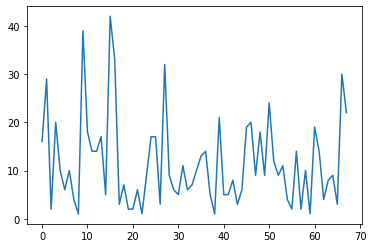

In [20]:
print(f'Plotting length for each anwser')
plt.plot(first_person['Answer_length']);

## exploring second participant

Number of missing values for first participant:


(15, 7)

index            0
User             0
Module           0
Step             0
Question         0
Answer           0
Answer_length    0
dtype: int64

Number of anwsers: (15, 7)
Plotting length for each anwser


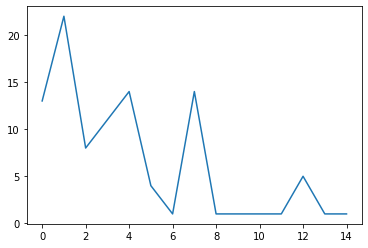

In [21]:
second_person = user_answered_questions('KB - Female (30s) CAN')
print(f'Number of missing values for first participant:')
display(second_person.shape)
display(second_person.isnull().sum())
print(f'Number of anwsers: {second_person.shape}')
# The lenght of the answers of the second person as a function of curse duration
second_person = second_person.reset_index()
print(f'Plotting length for each anwser')
plt.plot(second_person['Answer_length']);

## checking for pattern in lenght of answers

Let's check if there is a clear pattern for length of answers.

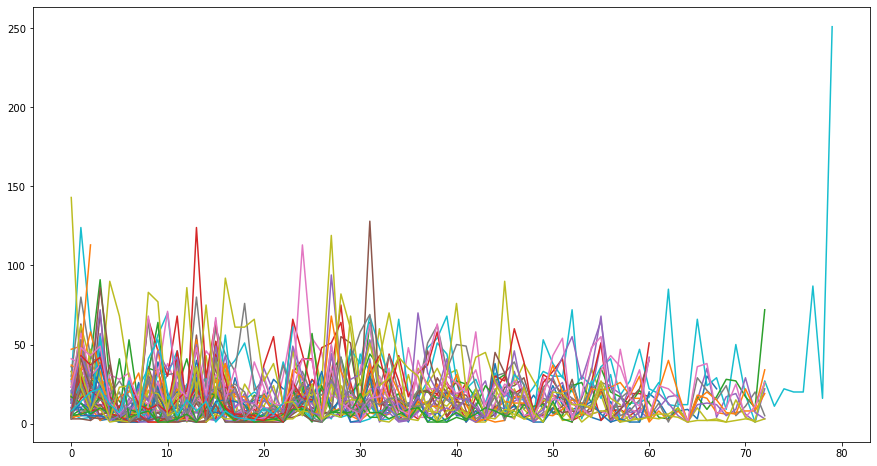

In [22]:
# List of all the participants
users_list = data.User.unique()

plt.figure(figsize=(15,8))
for i in users_list:
    plt.plot(user_answered_questions(i)['Answer_length'])

No clear pattern visible :) 

# Exploring number of answered Qs for each participants

## What are the most answered questions?

In [75]:
most_freq_qs = data.groupby(['Step','Question']).count()['User']
most_freq_qs = most_freq_qs.sort_values(ascending=False)
most_freq_qs.head(10)

Step    Question                                                                                   
Step_5  What does it feel like to be in this place?                                                    99
        How is this energy showing up in your body?                                                    99
Step_4  Identify another top value of yours, and let us know why this value is important to you        96
Step_1  What are you excited about as you begin your Leadership-Program experience?                    70
Step_2  In what ways do you feel you are currently showing up as a leader in your everyday life?       60
        In what ways would you like to be showing up differently as a leader in your everyday life?    58
        Why is this important to you?                                                                  57
        What’s one small action you can take right now to move towards this?                           57
        How do you want to remember this?           

In [62]:
mfq_1 = data[data.Question == 'How is this energy showing up in your body?']
print(f'Number of unique answers to this questions: {mfq_1.shape[0]}')
print(f'Number of unique users answered this questions: {mfq_1["User"].nunique()}')
print(f'Number of duplicated useres: {mfq_1[mfq_1["User"].duplicated()].shape[0]}')

Number of unique answers to this questions: 99
Number of unique users answered this questions: 49
Number of duplicated useres: 50


There are clearly some questions that were asked twice or answered twice! Let's have a closer look into that!

In [71]:
data.groupby(["Question","User"])["Answer"].count().nlargest(20)

Question                                                                                                              User                        
How is this energy showing up in your body?                                                                           JR Female (40s) CAN             4
What does it feel like to be in this place?                                                                           JR Female (40s) CAN             4
We love attaching a metaphor, saying, action, mantra or lyric to help us remember. How do you want to remember this?  AG Female (40s) CAN             3
                                                                                                                      AV Female (40s) CAN             3
                                                                                                                      BM Male (30s) South Africa      3
                                                                                             

There are questions answered even 4 times by the same person!

In [83]:
print(f'Number of unique rows: {data.shape[0]}')
print(f'Number of duplicated questions: {data[data["Question"].duplicated()].shape[0]}')
print(f'Number of unique questions: {data["Question"].nunique()}')
print(f'Number of duplicated answers: {data[data["Answer"].duplicated()].shape[0]}')
print(f'Number of unique answers: {data["Answer"].nunique()}')

Number of unique rows: 2562
Number of duplicated questions: 2495
Number of unique questions: 67
Number of duplicated answers: 69
Number of unique answers: 2493


# Looking into number of questions per module

In [108]:
# using participant who answered all questions

data.groupby("User")["Question"].count().nlargest(1)

User
CD Female (30s) South Africa    80
Name: Question, dtype: int64

In [86]:
user_answer_all_q = data[data.User == 'CD Female (30s) South Africa']
print("Number of questions per step:")
display(user_answer_all_q.groupby(['Step']).count()['Question'].nlargest(14))

Number of questions per step:


Step
Step_5     11
Step_2     10
Step_14     9
Step_7      9
Step_13     8
Step_10     7
Step_4      7
Step_9      5
Step_11     4
Step_12     3
Step_3      3
Step_1      2
Step_6      1
Step_8      1
Name: Question, dtype: int64

# Looking into module 1 in more details

In [38]:
module_1 = data[data.Module == 'Module_1']
module_1.groupby(['Question']).count()

,User,Module,Step,Answer,Answer_length
Question,,,,,
How do you want to remember this?,56,56,56,56,56
"Identify another top value of yours, and let us know why this value is important to you",96,96,96,96,96
"Identify one of your top values, and let us know why this value is important to you",49,49,49,49,49
In what ways do you feel you are currently showing up as a leader in your everyday life?,60,60,60,60,60
In what ways would you like to be showing up differently as a leader in your everyday life?,58,58,58,58,58
What are you excited about as you begin your Leadership-Program experience?,70,70,70,70,70
What are you noticing about conscious breathing?,52,52,52,52,52
What has to be part of the way you live your life for you to be who you are?,49,49,49,49,49
What was that experience like for you?,53,53,53,53,53


In [89]:
top_q = data[data.Question == 'Identify another top value of yours, and let us know why this value is important to you']
print(f'Number of unique users who answered this question: {top_q["User"].nunique()}')


Number of unique users who answered this question: 48


# Checking length of answers for each question

Max number of answers: 80
Min number of answers: 1


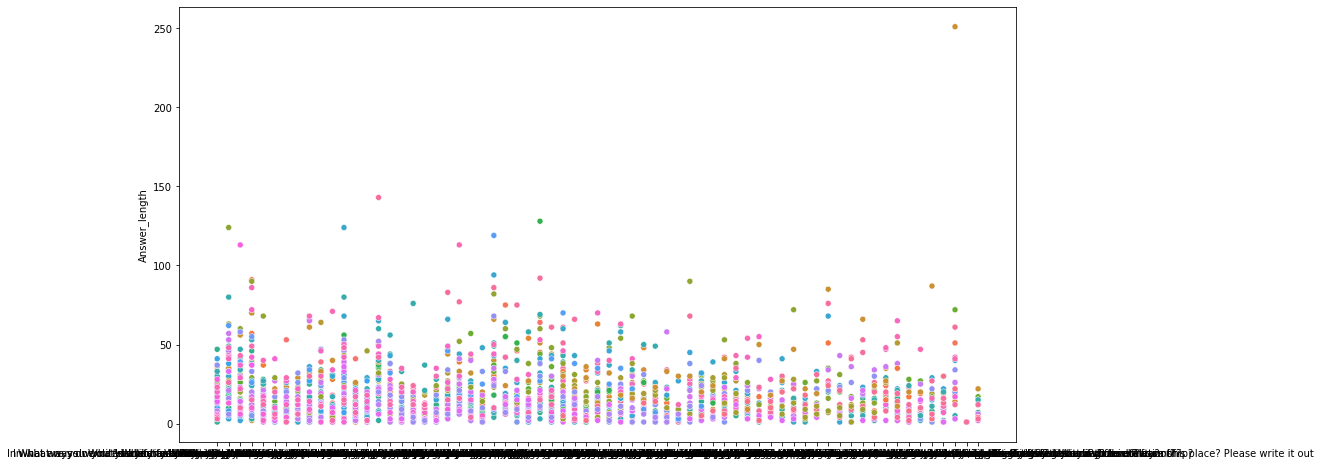

In [26]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Question', y='Answer_length', data=data, hue='User', legend=False)
ax.set(xlabel=None);

# Summary of number of answered questions per participant

In [30]:
# participant | # of answered Qs | shortest answer | longest answer
participants = data['User'].unique()
answers_overview = []
for participant in participants:
    #print(participant)
    cur_user = participant
    cur_data = data[data['User']==cur_user]
    number_of_answers = cur_data.shape[0] - cur_data.Answer.isnull().sum()
    answers_list = []
    for i in range(len(cur_data.Answer)):
        #print(i)
        if type(list(cur_data.Answer)[i]) == str:
            answers_list.append(len(list(cur_data.Answer)[i].split(" ")))
        else: answers_list.append(0)
        
    max_answer = max(answers_list)
    min_answer = min(answers_list)
    answers_overview.append([cur_user, number_of_answers, max_answer, min_answer])
    
data_overview = pd.DataFrame(answers_overview, columns=["User", "Number_of_answers", "Longest_answer", "Shortest_answer"])
data_overview.head()

,User,Number_of_answers,Longest_answer,Shortest_answer
0,MP - Female 36 UK,68,42,1
1,KB - Female (30s) CAN,15,22,1
2,MW - Male (40s) New Zealand,36,91,1
3,MD - Female 67 UK,61,75,1
4,DJ (30s) South Africa,73,57,1


In [31]:
print(f'Max number of answers: {max(data_overview.Number_of_answers)}')
print(f'Min number of answers: {min(data_overview.Number_of_answers)}')

Max number of answers: 80
Min number of answers: 1


In [32]:
print(f'Longest answer has: {max(data_overview.Longest_answer)} words')
print(f'Shortest answer has: {min(data_overview.Shortest_answer)} words')

Longest answer has: 251 words
Shortest answer has: 1 words


In [98]:
answers_per_user = data_overview.groupby('Number_of_answers')['User'].count()
answers_per_user.sort_values(ascending=False)

Number_of_answers
73    9
61    8
1     7
26    6
6     5
36    5
15    3
8     2
23    2
58    2
2     2
68    1
64    1
49    1
59    1
54    1
53    1
50    1
37    1
47    1
46    1
45    1
35    1
30    1
27    1
25    1
24    1
21    1
3     1
80    1
Name: User, dtype: int64

In [102]:
print('Participant who answered all questions:')
display(data_overview[data_overview['Number_of_answers']==80]['User'])

Participant who answered all questions:


9    CD Female (30s) South Africa
Name: User, dtype: object

## Plotting distribution of answered questions

In [97]:
print(f'Max number of answers: {max(data.groupby("User").count()["Answer"])}')
print(f'Min number of answers: {min(data.groupby("User").count()["Answer"])}')

Max number of answers: 80
Min number of answers: 1


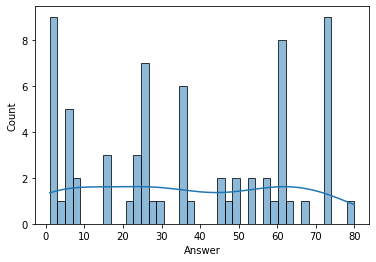

In [37]:
sns.histplot(data.groupby('User').count()['Answer'], bins=40, kde=True);

# Defining dropouts

## Pattern of answering questions

In [136]:
all_questions = data['Question'].unique()
all_users = data['User'].unique()

if_answered = pd.DataFrame(all_questions, columns=['Question'])

In [137]:
for u in all_users:
    cur_answers = []
    for q in all_questions:
        if q in list(data[data['User'] == u]["Question"]):
            cur_answers.append(1)
        else:
            cur_answers.append(0)
    if_answered[u] = cur_answers
if_answered.head(2)

,Question,MP - Female 36 UK,KB - Female (30s) CAN,MW - Male (40s) New Zealand,MD - Female 67 UK,DJ (30s) South Africa,SM Female (40s) New Zealand,MOH Female (48) CAN,LS Female (37) South Africa,KA Female (40s) CAN,...,MR Male (50s) CAN,SK Female (50s) CAN,AD Male (50s) CAN,SLB Female (50s) CAN,SA Female (48) CAN,AH Female (40s) CAN,NG Male (67) UK,SS Female (30s) South Africa,KD Male (40s) CAN,MW Female (36) UK
0,What are you excited about as you begin your L...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1,In what ways do you feel you are currently sho...,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,0


In [182]:
len(all_questions)

67

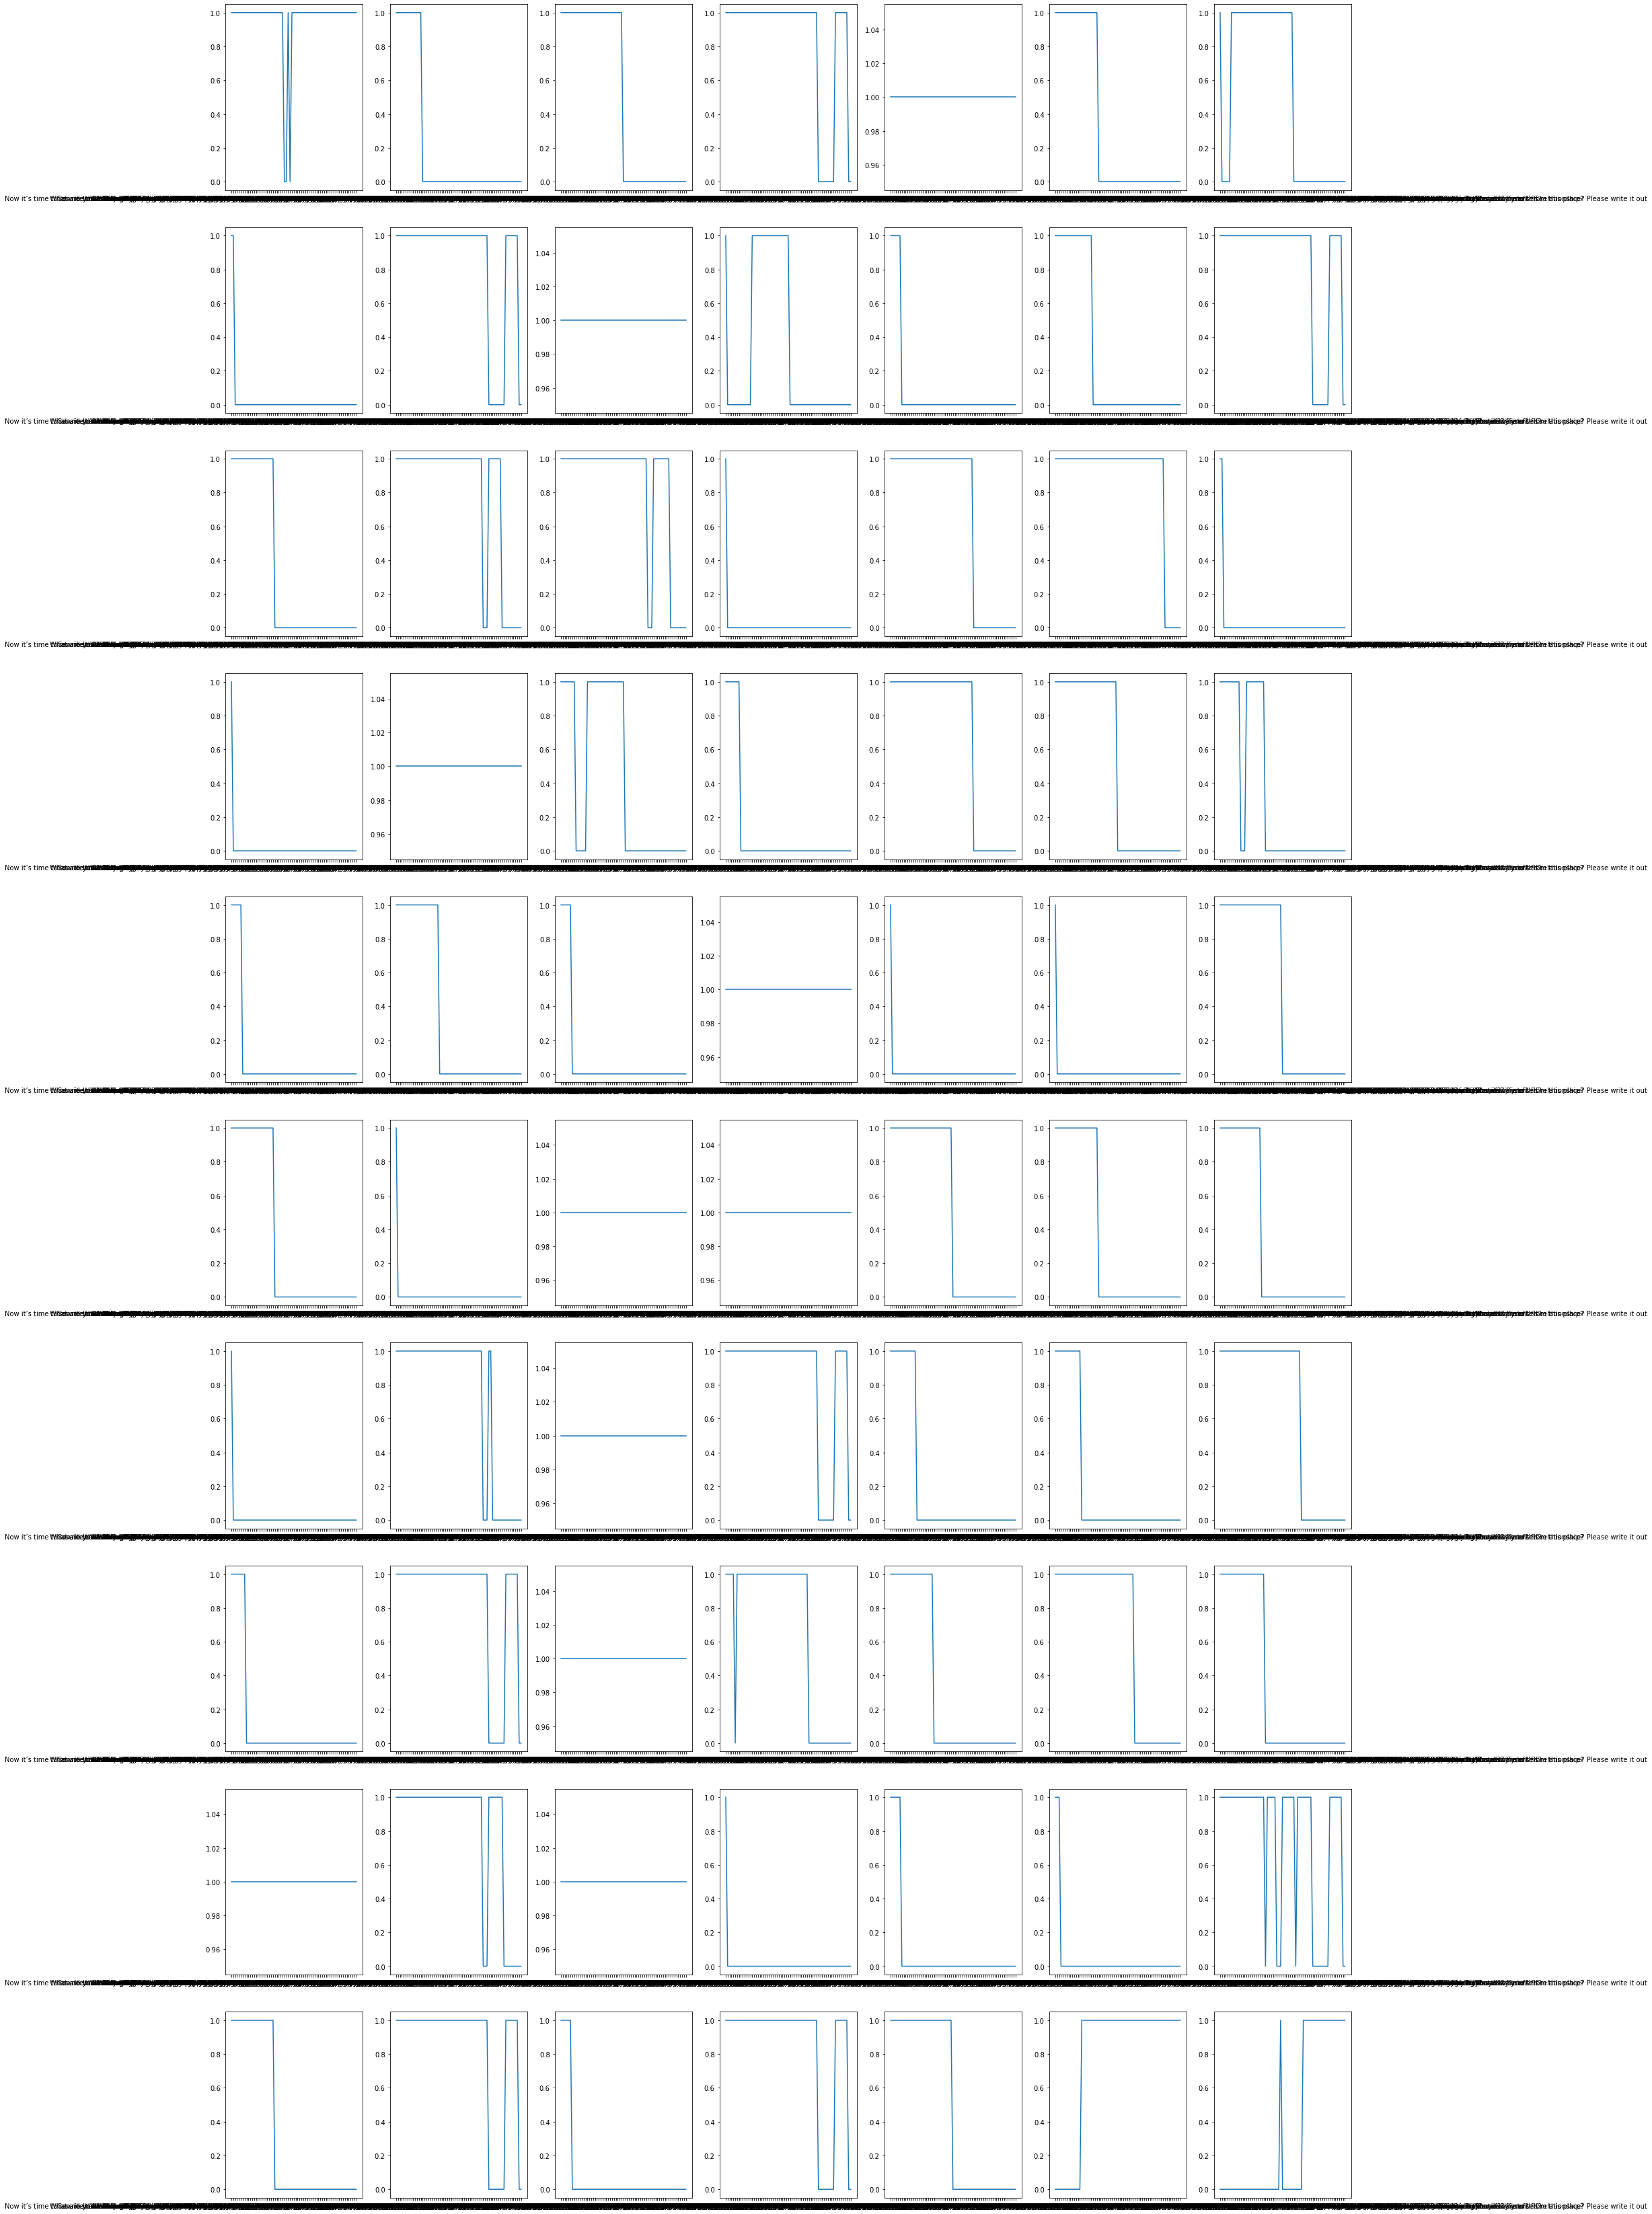

In [155]:
#plt.plot(figsize=(20,8))
plt.subplots(10,7, figsize=(30,60))
for i in range(70):
    cur_user = all_users[i]
    plt.subplot(10, 7, i+1)
    plt.plot(if_answered['Question'], if_answered[cur_user]);
    

In [200]:
temp = pd.DataFrame(if_answered.sum()[1:], columns=['sum'])
completion = temp[temp['sum'] == 67]
#temp.sort_values(by=temp['sum'],axis=1)

In [201]:
completion_names = completion.index

In [202]:
completion_names

Index(['DJ (30s) South Africa', 'CD Female (30s) South Africa',
       'AV Female (40s) CAN', 'SOD Male (38) UK', 'JS Male (30s) South Africa',
       'BM Male (30s) South Africa', 'RA Male (70s) CAN',
       'DV Female (30s) South Africa', 'AG Female (40s) CAN',
       'JP Female (40s) CAN'],
      dtype='object')